In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from os import path

In [7]:
def plot_and_save(df, name, kind='line', xlabel=None, ylabel=None, **kwargs):
    ax = df.plot(kind=kind, **kwargs)
    
    if xlabel != None:
        ax.set_xlabel(xlabel)
    if ylabel != None:
        ax.set_ylabel(ylabel)
    plt.tight_layout()
    
    ax.legend().set_visible(False)
    mpl.pyplot.savefig("../../paper/plots/" + name + "_no_legend.pdf", dpi=300)
    ax.legend().set_visible(True)
    mpl.pyplot.savefig("../../paper/plots/" + name + ".pdf", dpi=300)

In [3]:
def read(name):
    df = pd.read_csv("../../paper/plots/{}.csv".format(name), header=0, index_col=0)
    if path.isfile("../../paper/plots/{}_std_err.csv".format(name)):
        return (df, pd.read_csv("../../paper/plots/{}_std_err.csv".format(name), header=0, index_col=0))
    return (df, None)

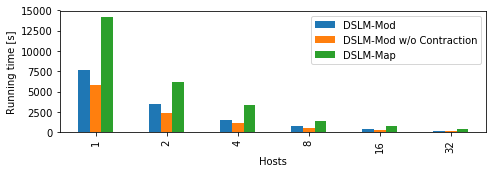

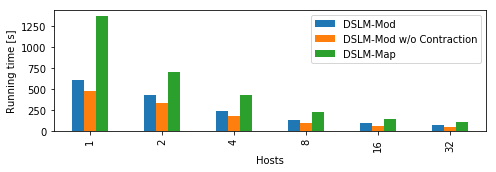

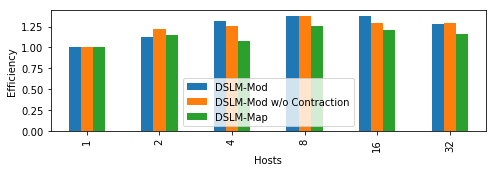

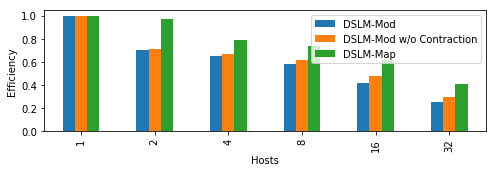

In [3]:
for name in ['strong_scaling_1thread_runtime', 'strong_scaling_16threads_runtime']:
    df = pd.read_csv("../../dist-thrill-cluster/plots/{}.csv".format(name), header=0, index_col=0)
    plot_and_save(df, name, kind='bar', figsize=(7, 2.5), ylabel="Running time [s]", xlabel='Hosts')
    
for name in ['strong_scaling_1thread_efficiency', 'strong_scaling_16threads_efficiency']:
    df = pd.read_csv("../../dist-thrill-cluster/plots/{}.csv".format(name), header=0, index_col=0)
    plot_and_save(df, name, kind='bar', figsize=(7, 2.5), ylabel="Efficiency", xlabel='Hosts')

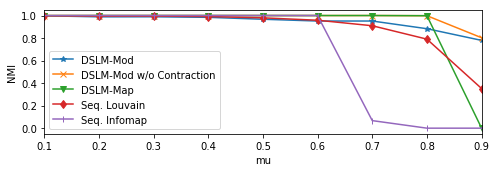

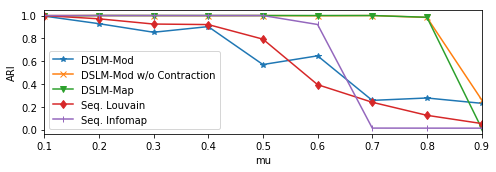

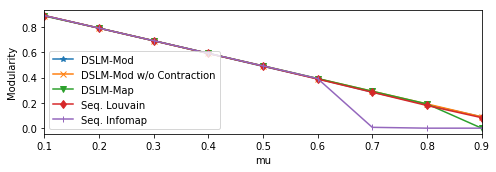

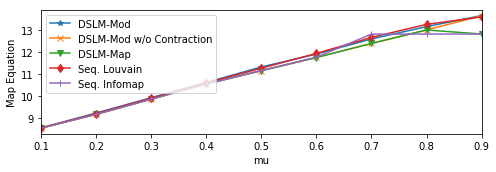

In [4]:
df = pd.read_csv("../../dist-thrill-cluster/plots/quality_NMI.csv".format(name), header=0, index_col=0)
plot_and_save(df, 'quality_NMI', figsize=(7, 2.5), ylabel="NMI", style=['-*', '-x', '-v', '-d', '-|'])
df = pd.read_csv("../../dist-thrill-cluster/plots/quality_ARI.csv".format(name), header=0, index_col=0)
plot_and_save(df, 'quality_ARI', figsize=(7, 2.5), ylabel="ARI", style=['-*', '-x', '-v', '-d', '-|'])
df = pd.read_csv("../../dist-thrill-cluster/plots/quality_modularity.csv".format(name), header=0, index_col=0)
plot_and_save(df, 'quality_modularity', figsize=(7, 2.5), ylabel="Modularity", style=['-*', '-x', '-v', '-d', '-|'])
df = pd.read_csv("../../dist-thrill-cluster/plots/quality_map_equation.csv".format(name), header=0, index_col=0)
plot_and_save(df, 'quality_map_equation', figsize=(7, 2.5), ylabel="Map Equation", style=['-*', '-x', '-v', '-d', '-|'])

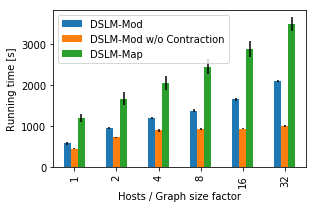

In [8]:
(df, err) = read("weak_scaling_runtime")
plot_and_save(df, "weak_scaling_runtime", yerr=err, kind='bar', figsize=(4.5, 3), ylabel="Running time [s]", xlabel="Hosts / Graph size factor")

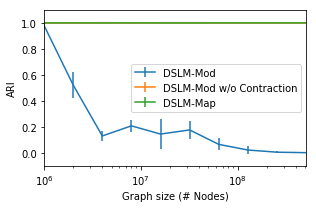

In [9]:
(df, err) = read("weak_scaling_ARI")
plot_and_save(df, 'weak_scaling_ARI', yerr=err, figsize=(4.5, 3), ylabel="ARI", xlabel="Graph size (# Nodes)", logx=True, style=['-*', '-x', '-v'], ylim=(-0.1, 1.1))

In [ ]:
df = pd.read_csv("../../dist-thrill-cluster/plots/weak_scaling_NMI.csv".format(name), header=0, index_col=0)
plot_and_save(df, 'weak_scaling_NMI', figsize=(7, 2.5), ylabel="NMI", xlabel="Graph size (# Nodes)", logx=True, style=['-*', '-x', '-v'], ylim=(-0.1, 1.1))

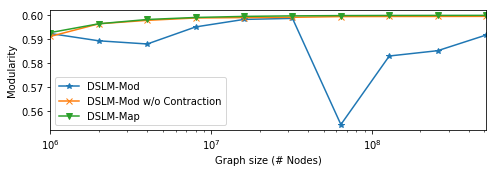

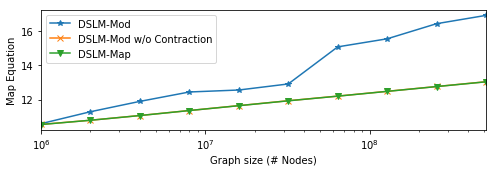

In [4]:
df = pd.read_csv("../../dist-thrill-cluster/plots/weak_scaling_modularity.csv", header=0, index_col=0)
plot_and_save(df, 'weak_scaling_modularity', figsize=(7, 2.5), ylabel="Modularity", xlabel="Graph size (# Nodes)", logx=True, style=['-*', '-x', '-v'])

df = pd.read_csv("../../dist-thrill-cluster/plots/weak_scaling_map_equation.csv", header=0, index_col=0)
plot_and_save(df, 'weak_scaling_map_equation', figsize=(7, 2.5), ylabel="Map Equation", xlabel="Graph size (# Nodes)", logx=True, style=['-*', '-x', '-v'])